<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 18</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [1]:
using PyPlot;

In [2]:
include("Modulos/herramientas.jl");

## Sistemas Dinámicos Discretos

Tenemos el sistema dinámico, conocido como _mapeo logístico_

$$x_{n+1}=rx_{n}(1-x_{n}),\:\:r\in[0,4]\:\mathrm{y}\:x\in[0,1]$$

Entonces $f(x_{n})=rx_{n}(1-x_{n})$. Se grafica el exponente de Lyapunov en función de $r$, además del diagrama de bifurcaciones.

El exponente de Lyapunov $\lambda$ está dado por

$$\lambda(x_{0})=\lim_{n\to\infty}\frac{1}{n}\sum_{i=0}^{n-1}\log\left|\:f'(x_{i})\right|\:\:\mathrm{con}\:\:x_{i}=f(x_{i-1}).$$

Para obtener el diagrama de bifurcaciones se necesita iterar muchas veces el sistema dinámico, esto es, se grafica $x_{\infty}$ _vs_ $\:x$ donde $x_{\infty}=f^{n}(x)=f\circ f^{n-1}(x)$ para $n$ muy grande.

In [3]:
function lyapunov(f,x0,list,n)
    
    lambda = []                                      # Conjunto que guardará el exponente de Lyapunov.
    bif = []                                         # Conjunto que guardará las iteraciones del sistema para obtener el diagrama de fases.
    rbif = []
    
    for r in list
        x = x0
        g(z) = f(z,r)                                # Para r fija, f es una función de una variable.
        y = herramientas.derivada_numerica(g,x)      # Se calcula la derivada de f en x para r fija.
        l = log(abs(y))                              # Se obtiene el valor absoluto de la derivada de f en x.
        for i in 2:n
            x = f(x,r)                               # Ecuación del sistema dinánico discreto. En mapeo logístico f(x,r)=rx(1-x).
            y = herramientas.derivada_numerica(g,x)  # La derivada de f en el nuevo valor de x.
            l += log(abs(y))                         # Se le agregan a l los logaritmos de |f'| en x, pues lo requiere el exponente de Lyapunov.
        end
        push!(lambda,l/n)                            # Finalmente se agrega a lambda el valor l/n que resulta ser el exponente de Lyapunov al valor r.
        for j in 1:200
            x = f(x,r)                               # Se calculan más iteraciones del sistema discreto, pues el diagrama de bifurcaciones necesita iteraciones grandes.
            push!(bif,x)                             # Se agregan estas iteraciones a bif.
            push!(rbif,r)
        end
    end
    
    return lambda,rbif,bif
    
end;

In [4]:
f(x,r)=r*x*(1-x);  # Mapeo logístico.

In [5]:
r=linspace(1,4,500)
L=lyapunov(f,0.1,r,10000);

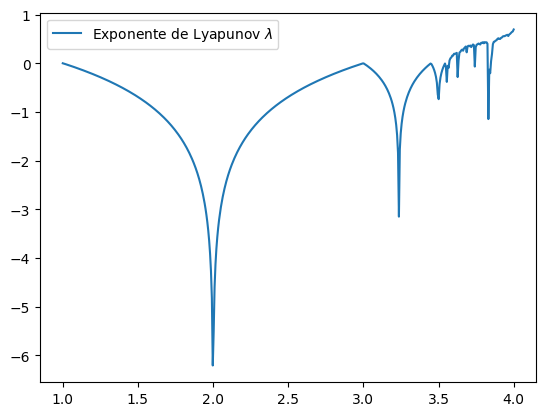

In [6]:
plot(r,L[1],label=L"Exponente de Lyapunov $\lambda$")
legend();

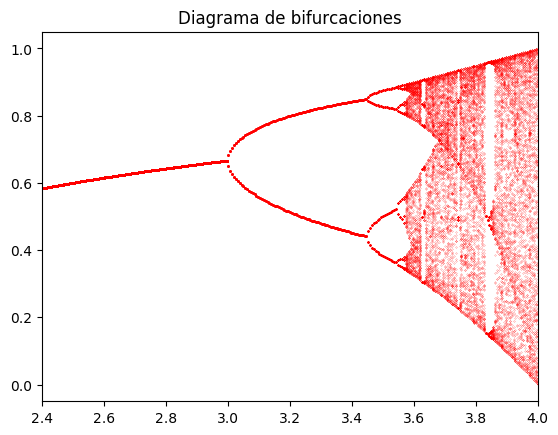

In [7]:
plot(L[2],L[3],"r.",markersize=0.3)
title("Diagrama de bifurcaciones")
xlim(2.4,4);

Vamos a colocar ambas gráficas juntas (escalando y recorriendo la gráfica del exponente de Lyapunov para que ambas queden en la misma imagen $[0,1]$).

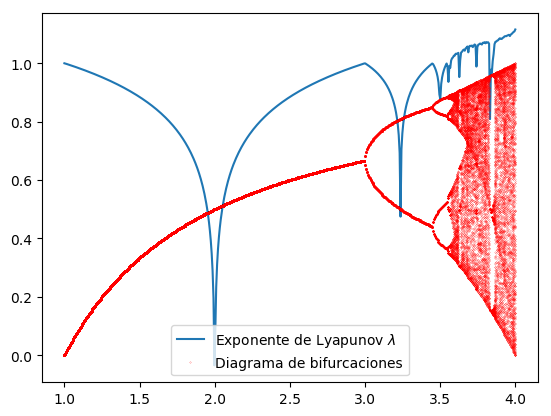

In [8]:
plot(r,(1/6)*L[1]+1,label=L"Exponente de Lyapunov $\lambda$")
plot(L[2],L[3],"r.",markersize=0.3,label="Diagrama de bifurcaciones")
legend();

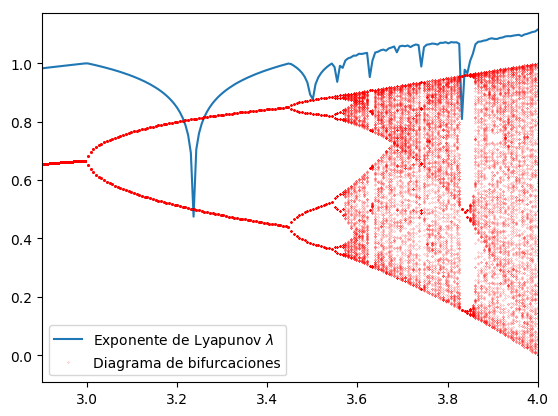

In [9]:
plot(r,(1/6)*L[1]+1,label=L"Exponente de Lyapunov $\lambda$")
plot(L[2],L[3],"r.",markersize=0.3,label="Diagrama de bifurcaciones")
xlim(2.9,4);
legend();

Se observa que las bifurcaciones ocurren cuando el exponente de Lyapunov pasa de ser creciente a ser decreciente.

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>